# GRAPHS GRAPHS GRAPHS

#### Imports

In [1]:
import os
import ast
import json
import shutil
import platform
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col

tqdm.pandas()
if platform.node() == 'Nick_Laptop':
    drive = 'C'
elif platform.node() == 'MSI':
    drive = 'D'
else:
    drive = 'uhhhhhh'
    print('Uhhhhhhhhhhhhh')
os.chdir(f'{drive}:/PhD/DissolutionProgramming/LND---Land-Paper')

PROCESSED = 'Data/Processed'
RAW = 'Data/Raw'
SURNAMES = f'{PROCESSED}/surname_info'
IMAGES = 'Output/Images'
TABLES = 'Output/Tables'

#### Loading

In [2]:
fhdf = pd.read_csv(f'{PROCESSED}/freeholders_list_1713_1780_final.csv')
wdf = pd.read_csv(f'{PROCESSED}/ukda_pcc_wills_final.csv')

id_vars = [
    'unique_id',
    'group_id',
    'combined_id',
    'metaphone_id',
    'master_id'
]

#### Plotting Treatment Vs Control

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

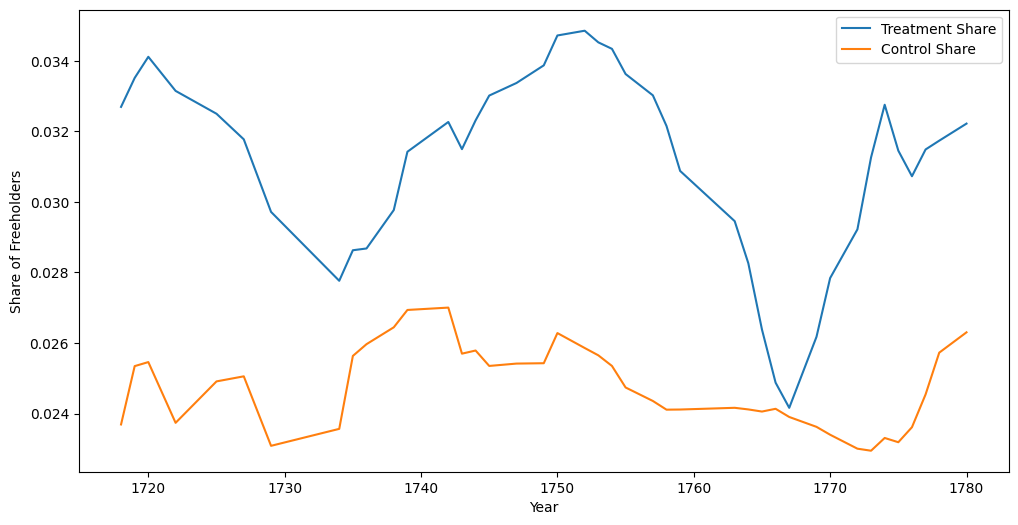

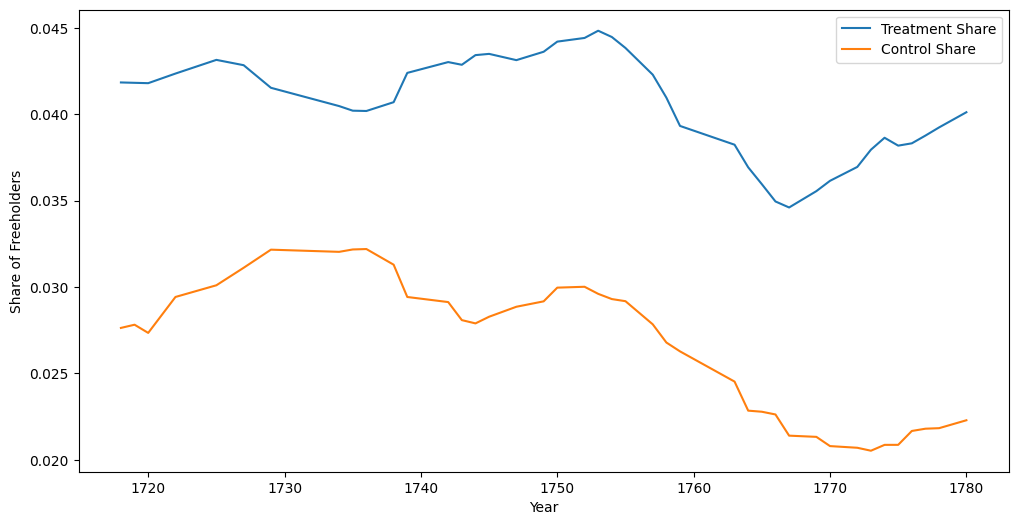

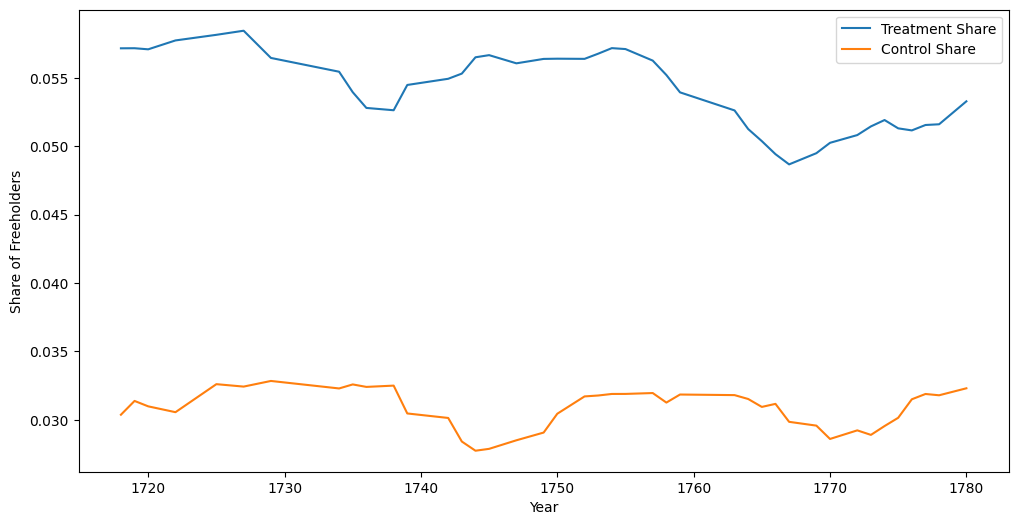

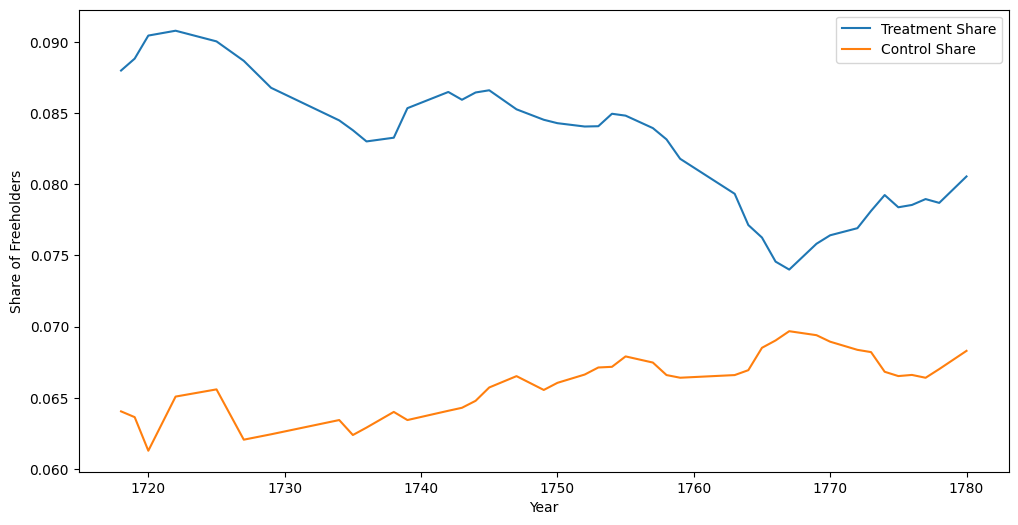

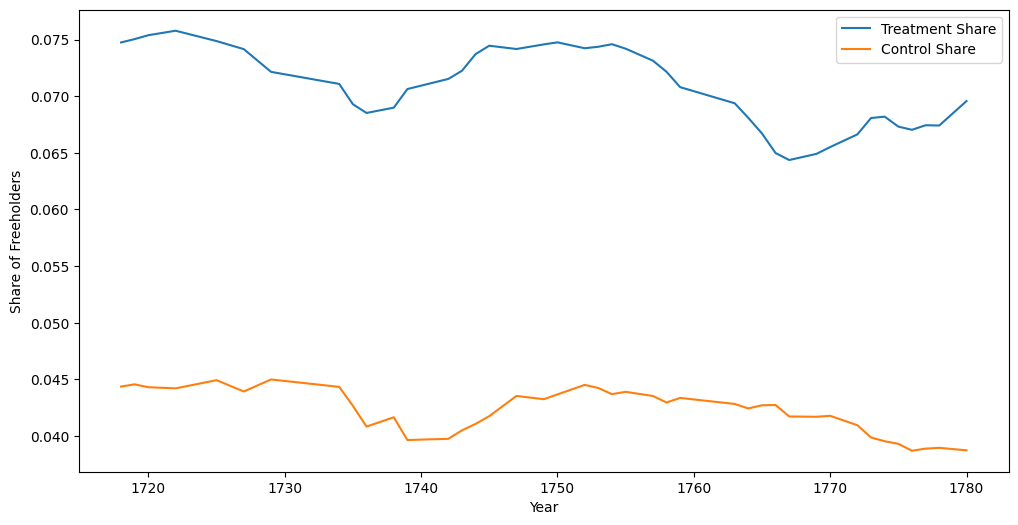

In [3]:
for id_var in id_vars:
    id_type = id_var.split('_')[0]
    yearly_df = pd.DataFrame()
    year_list = sorted(fhdf['year'].unique())
    for year in tqdm(year_list):
        treatment_share = len(fhdf.loc[(fhdf['year'] == year) & (fhdf[f'{id_type}_treatment'] == 1)]) / len(fhdf.loc[fhdf['year'] == year])
        control_share = len(fhdf.loc[(fhdf['year'] == year) & (fhdf[f'{id_type}_control'] == 1)]) / len(fhdf.loc[fhdf['year'] == year])
        year_df = pd.DataFrame({
            'year': [year],
            f'treatment_share': [treatment_share],
            f'control_share': [control_share]
        })
        yearly_df = pd.concat([yearly_df, year_df], ignore_index=True)
    yearly_df['treatment_share_rolling'] = yearly_df['treatment_share'].rolling(5).mean()
    yearly_df['control_share_rolling'] = yearly_df['control_share'].rolling(5).mean()
    yearly_df.reset_index(drop=True, inplace=True)

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(data=yearly_df, x='year', y='treatment_share_rolling', label='Treatment Share', ax=ax)
    sns.lineplot(data=yearly_df, x='year', y='control_share_rolling', label='Control Share', ax=ax)
    plt.xlabel('Year')
    plt.ylabel('Share of Freeholders')
    # ax.set_title(f'{id_type.capitalize()} Treatment and Control Share of Freeholders')
    plt.savefig(f'{IMAGES}/{id_type}_freeholder_list_shares.png')


  0%|          | 0/356 [00:00<?, ?it/s]

  0%|          | 0/356 [00:00<?, ?it/s]

  0%|          | 0/356 [00:00<?, ?it/s]

  0%|          | 0/356 [00:00<?, ?it/s]

  0%|          | 0/356 [00:00<?, ?it/s]

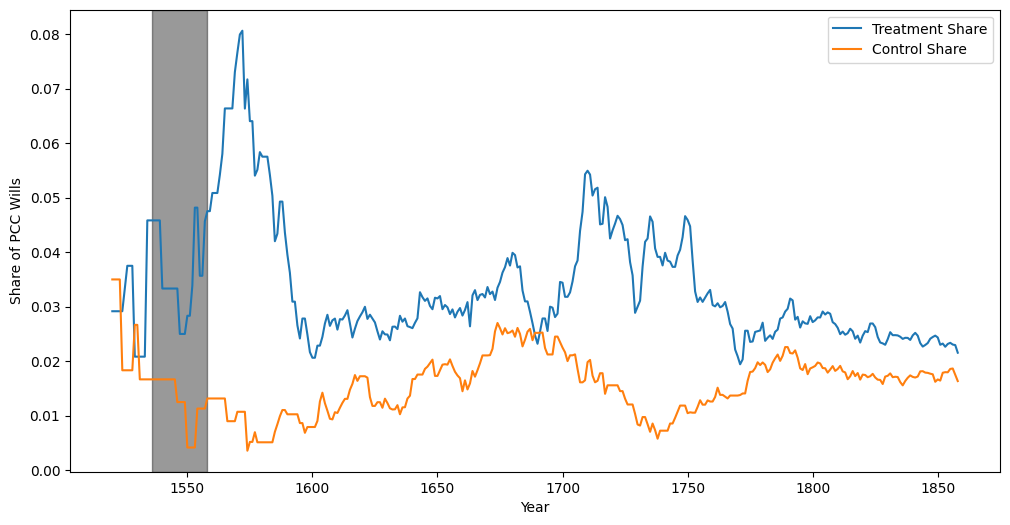

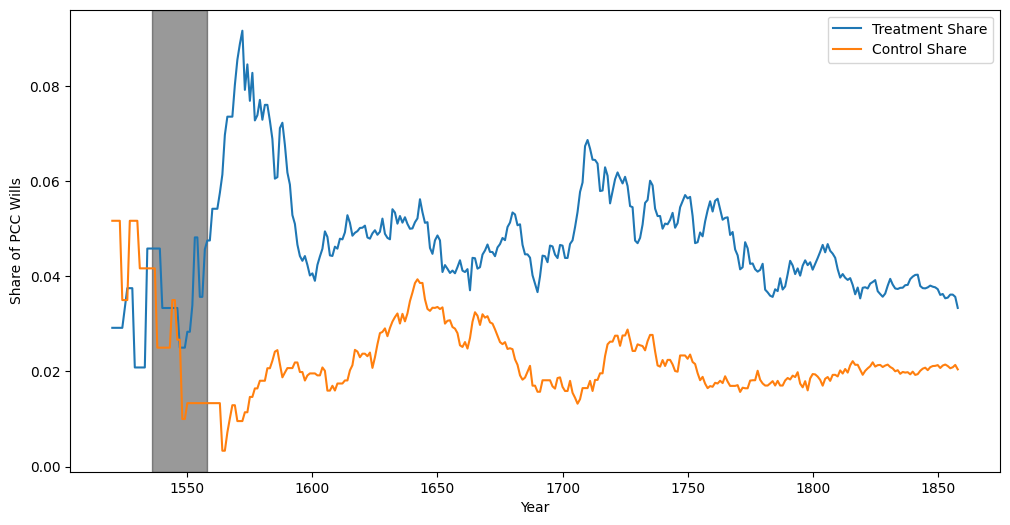

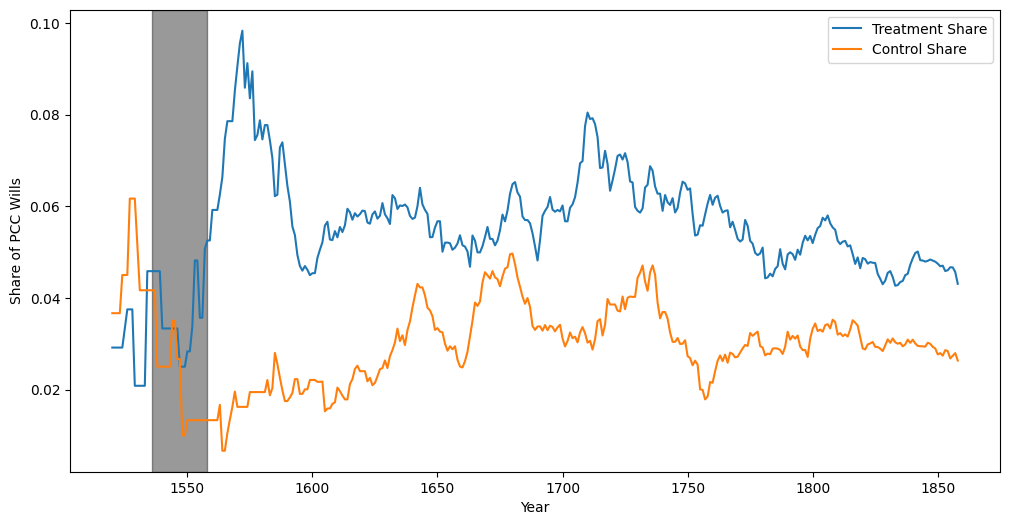

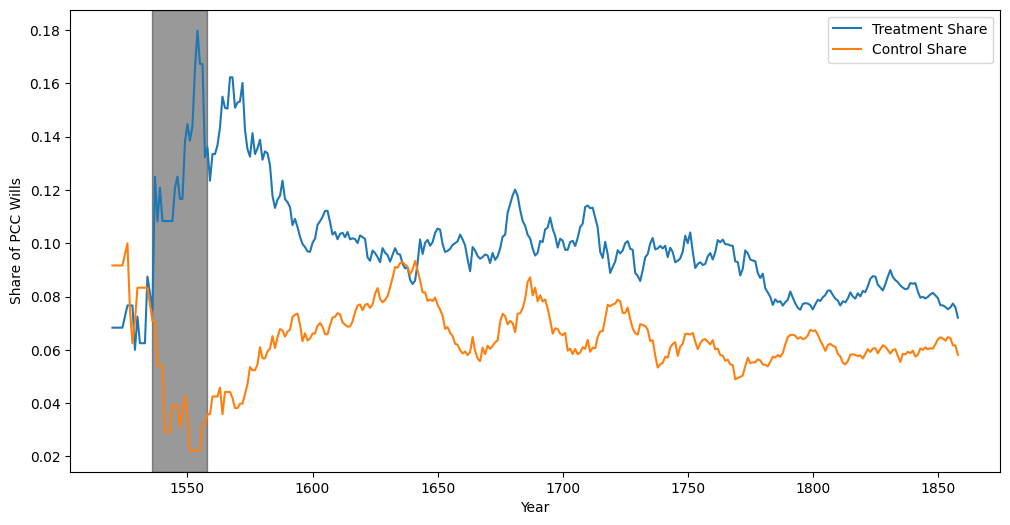

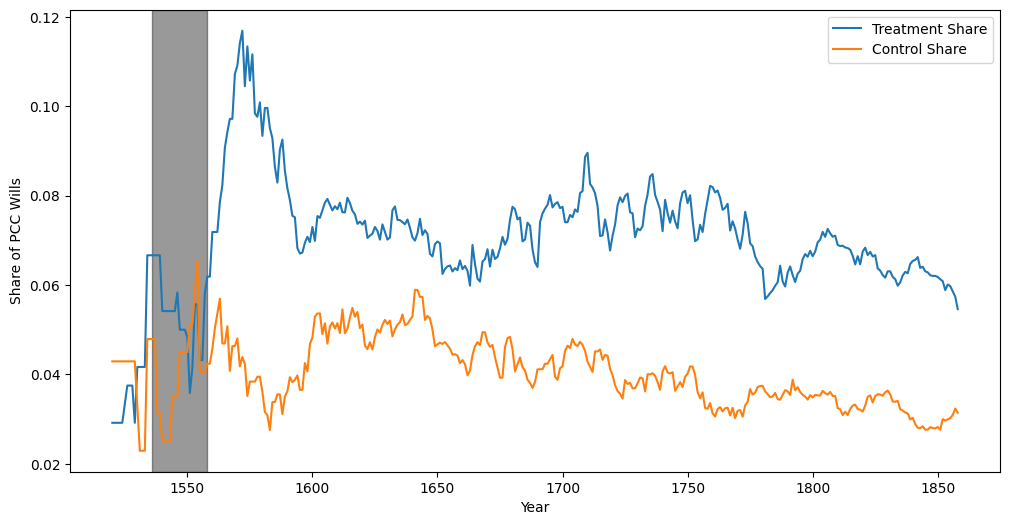

In [4]:
for id_var in id_vars:
    id_type = id_var.split('_')[0]
    yearly_df = pd.DataFrame()
    year_list = sorted(wdf['year'].unique())
    year_list = [year for year in year_list if year >= 1500]
    for year in tqdm(year_list):
        treatment_share = len(wdf.loc[(wdf['year'] == year) & (wdf[f'{id_type}_treatment'] == 1)]) / len(wdf.loc[wdf['year'] == year])
        control_share = len(wdf.loc[(wdf['year'] == year) & (wdf[f'{id_type}_control'] == 1)]) / len(wdf.loc[wdf['year'] == year])
        year_df = pd.DataFrame({
            'year': [year],
            f'treatment_share': [treatment_share],
            f'control_share': [control_share]
        })
        yearly_df = pd.concat([yearly_df, year_df], ignore_index=True)
    yearly_df['treatment_share_rolling'] = yearly_df['treatment_share'].rolling(20).mean()
    yearly_df['control_share_rolling'] = yearly_df['control_share'].rolling(20).mean()
    yearly_df.reset_index(drop=True, inplace=True)

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(data=yearly_df, x='year', y='treatment_share_rolling', label='Treatment Share', ax=ax)
    sns.lineplot(data=yearly_df, x='year', y='control_share_rolling', label='Control Share', ax=ax)
    plt.xlabel('Year')
    plt.ylabel('Share of PCC Wills')
    plt.axvspan(1536, 1558, alpha=0.4, color='black')
    # ax.set_title(f'{id_type.capitalize()} Treatment and Control Share of PCC Wills')
    plt.savefig(f'{IMAGES}/{id_type}_will_list_shares.png')